In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.preprocessing import scale

In [2]:
def plot_data_labels_dict(data_labels_dict, n_datasets, cmap="bwr"):
    fig, axes = plt.subplots(n_datasets, 2, figsize=(10, 24/5*n_datasets), sharex=True, sharey=True)
    for i, (category, (data, labels)) in enumerate(data_labels_dict.items()):
        axes[i][0].scatter(data[:, 0], data[:, 1], s=1)
        axes[i][1].scatter(data[:, 0], data[:, 1], s=1, c=labels, cmap=cmap)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [3]:
n_datapoints = 10_000

# scikit-learn datasets

In [4]:
sk_datasets = {}
sk_labels = {}

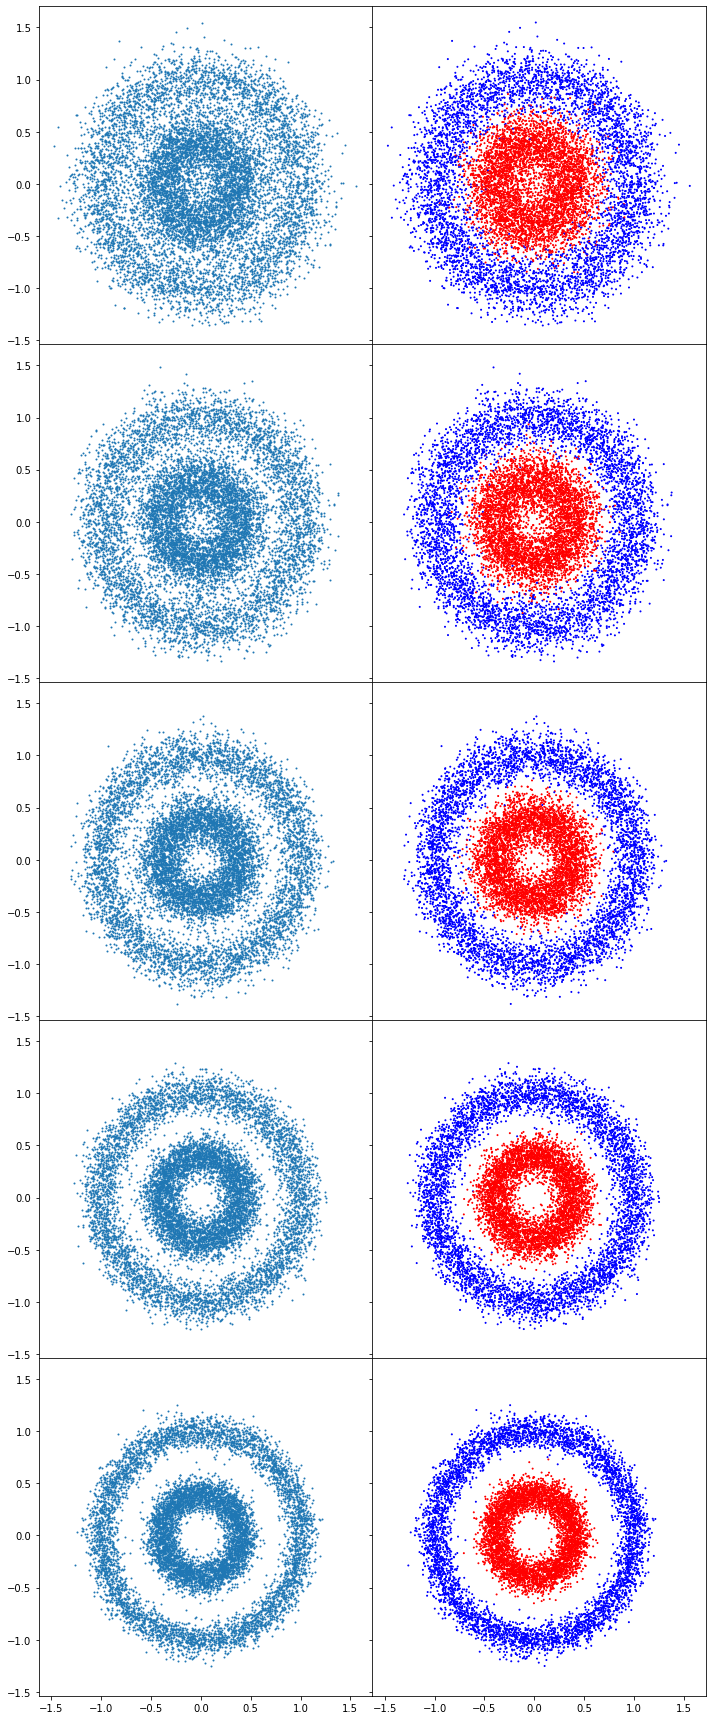

In [5]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.16, 0.14, 0.12, 0.1, 0.08]

circles_dict = {category:datasets.make_circles(n_samples=n_datapoints, noise=level, factor=0.4)
              for category, level in zip(noise_categories, noise_levels)}

plot_data_labels_dict(circles_dict, len(noise_categories))

for category, (data, labels) in circles_dict.items():
    sk_datasets["circles_" + category + "_noise"] = data
    sk_labels["circles_" + category + "_noise"] = labels

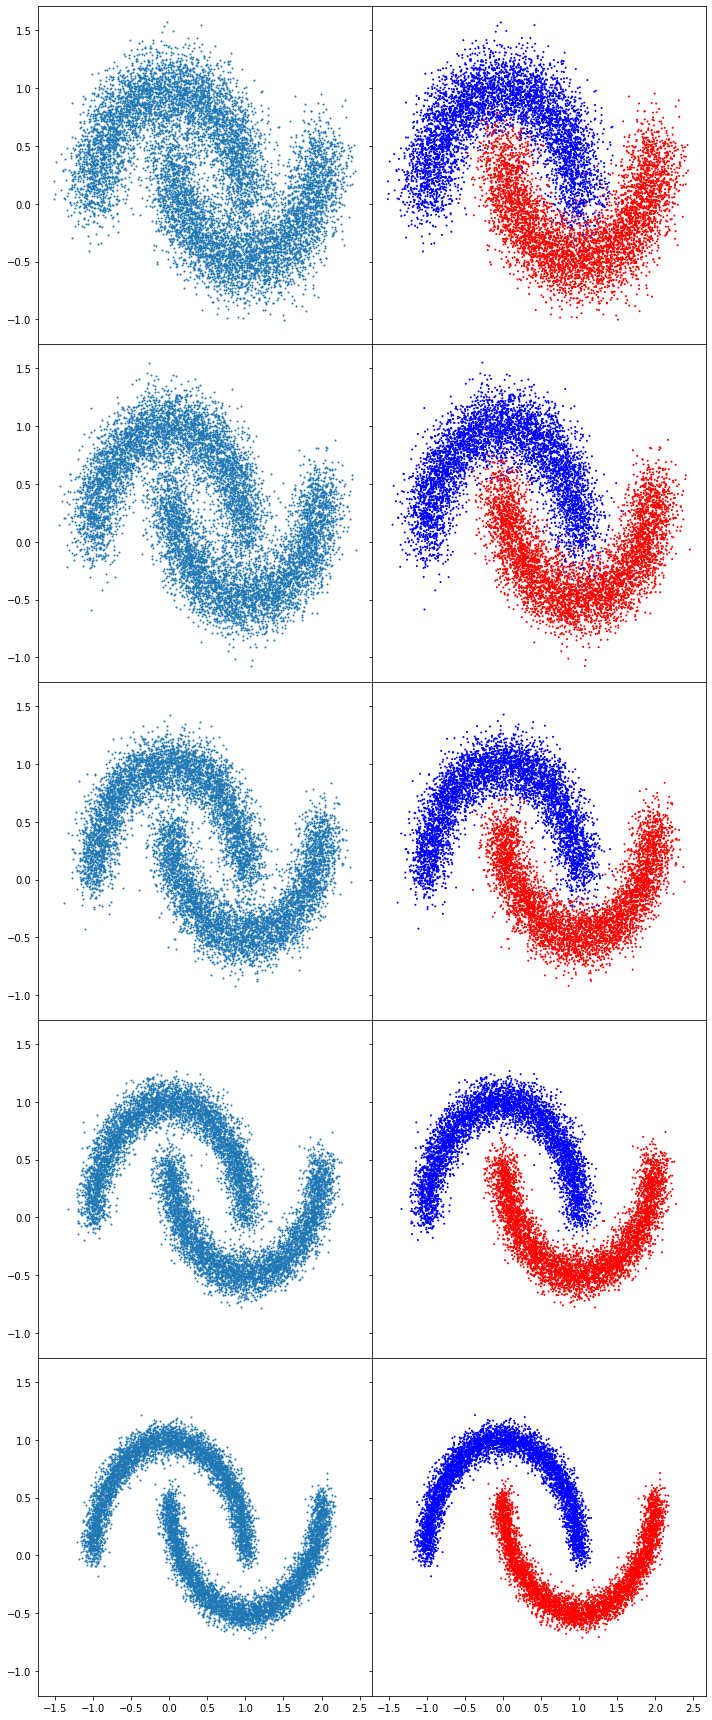

In [6]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.18, 0.16, 0.13, 0.1, 0.07]

moons_dict = {category:datasets.make_moons(n_samples=n_datapoints, noise=level)
              for category, level in zip(noise_categories, noise_levels)}

plot_data_labels_dict(moons_dict, 5)
    
for category, (data, labels) in moons_dict.items():
    sk_datasets["moons_" + category + "_noise"] = data
    sk_labels["moons_" + category + "_noise"] = labels

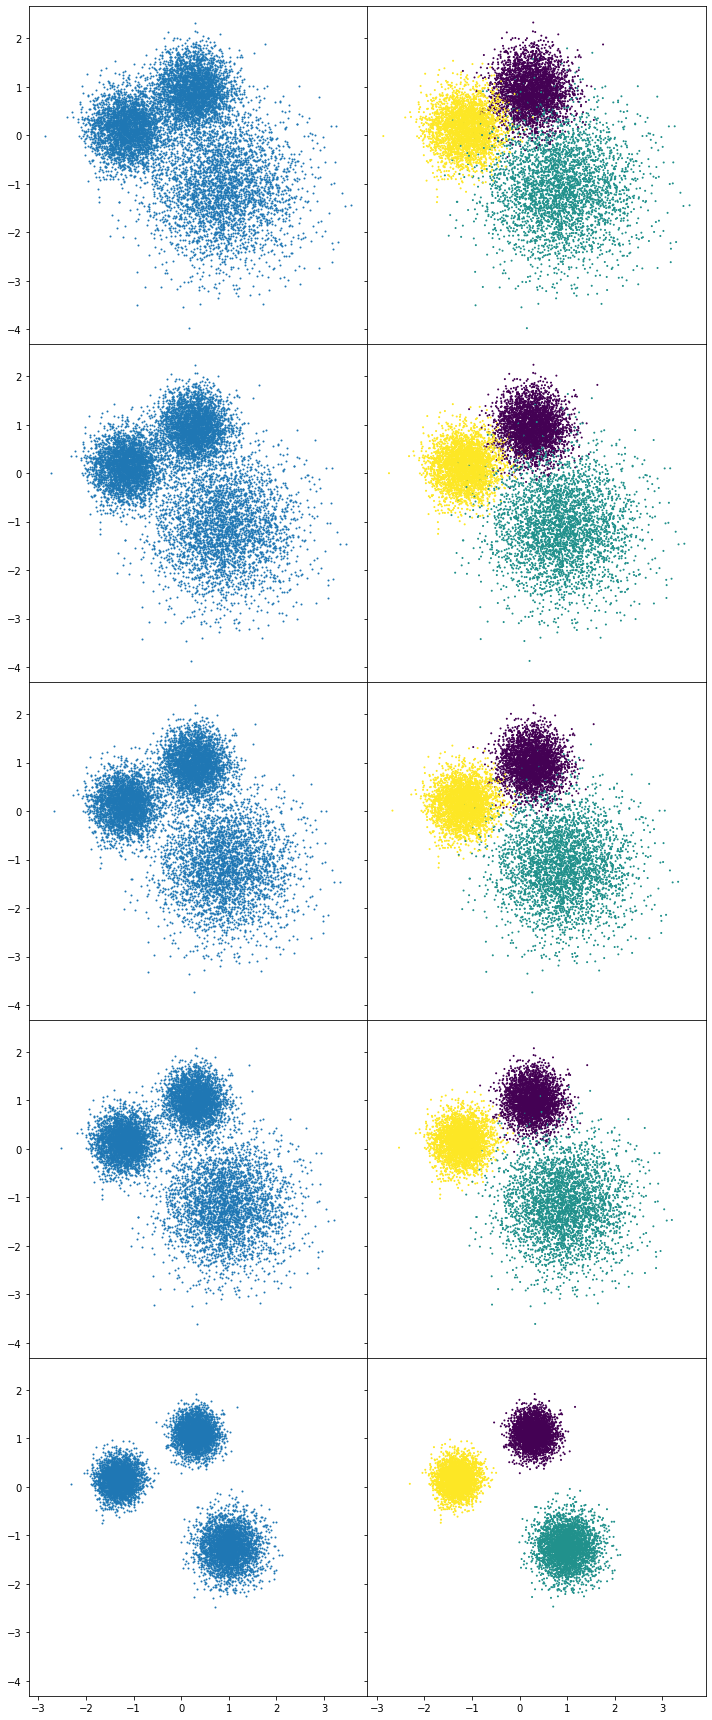

In [7]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [(0.7, 1.4, 0.7), 
                (0.625, 1.3, 0.625), 
                (0.575, 1.2, 0.575), 
                (0.5, 1.1, 0.5), 
                (0.35, 0.5, 0.35)]

blobs_dict = {category:datasets.make_blobs(n_samples=n_datapoints, cluster_std=level, random_state=0)
              for category, level in zip(noise_categories, noise_levels)}
blobs_dict = {category:(scale(data), labels) for category, (data, labels) in blobs_dict.items()}


plot_data_labels_dict(blobs_dict, 5, "viridis")

for category, (data, labels) in blobs_dict.items():
    sk_datasets["blobs_" + category + "_noise"] = data
    sk_labels["blobs_" + category + "_noise"] = labels

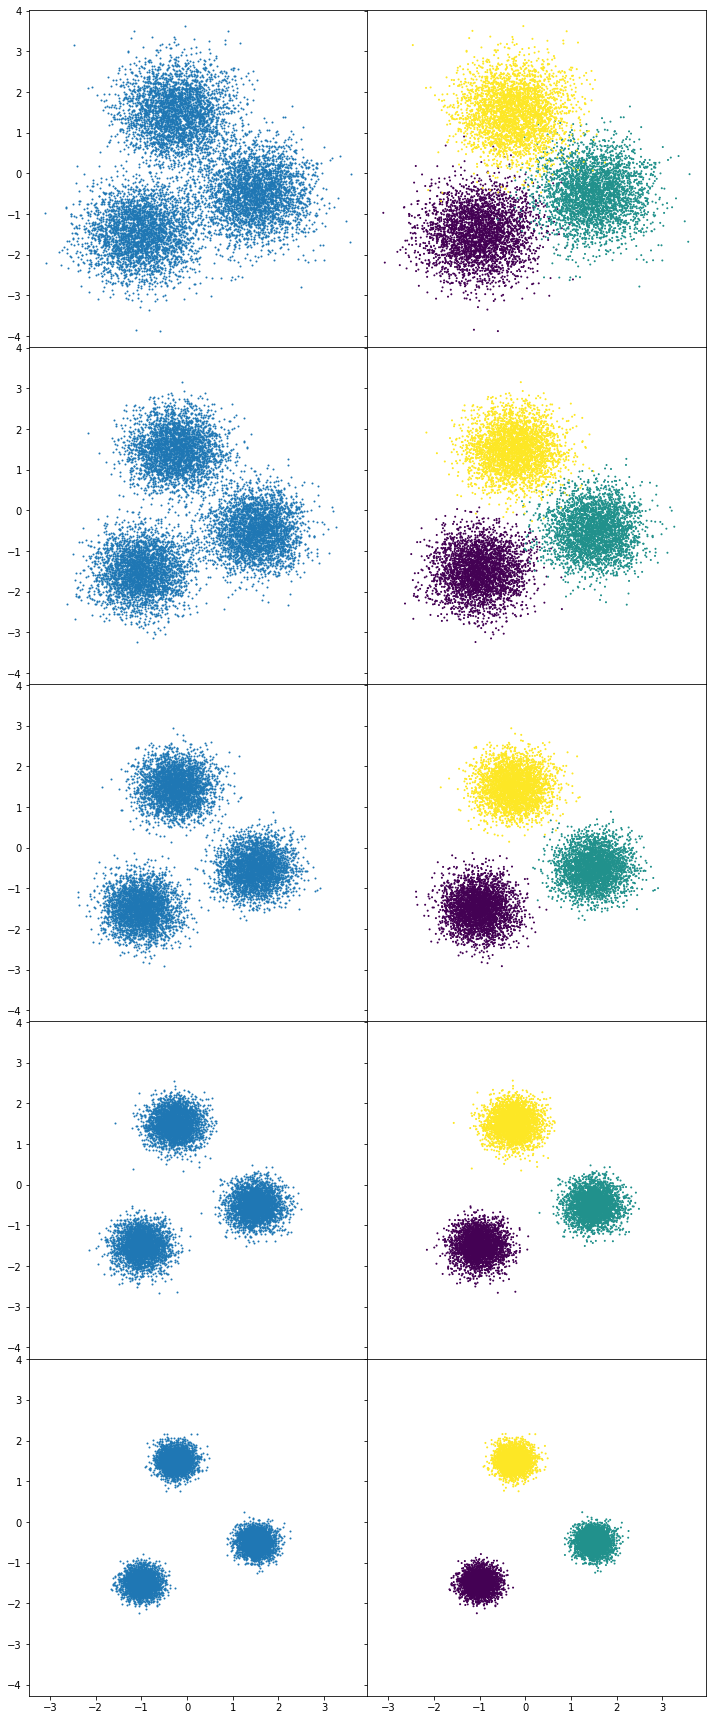

In [8]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.6, 0.5, 0.4, 0.3, 0.2]
centers = [(-1, -1.5), (1.5, -0.5), (-0.25, 1.5)]
blobs2_dict = {}

for category, level in zip(noise_categories, noise_levels):
    xs = []
    ys = []
    labels = []
    for i, center in enumerate(centers):
        xs.extend(np.random.normal(center[0], level, n_datapoints//3))
        ys.extend(np.random.normal(center[1], level, n_datapoints//3))
        labels.extend([i]*(n_datapoints//3))
    xys = np.column_stack((np.array(xs), np.array(ys)))
    labels = np.array(labels)
    blobs2_dict[category] = (xys, labels)
    
plot_data_labels_dict(blobs2_dict, 5, "viridis")

for category, (data, labels) in blobs2_dict.items():
    sk_datasets["blobs2_" + category + "_noise"] = data
    sk_labels["blobs2_" + category + "_noise"] = labels


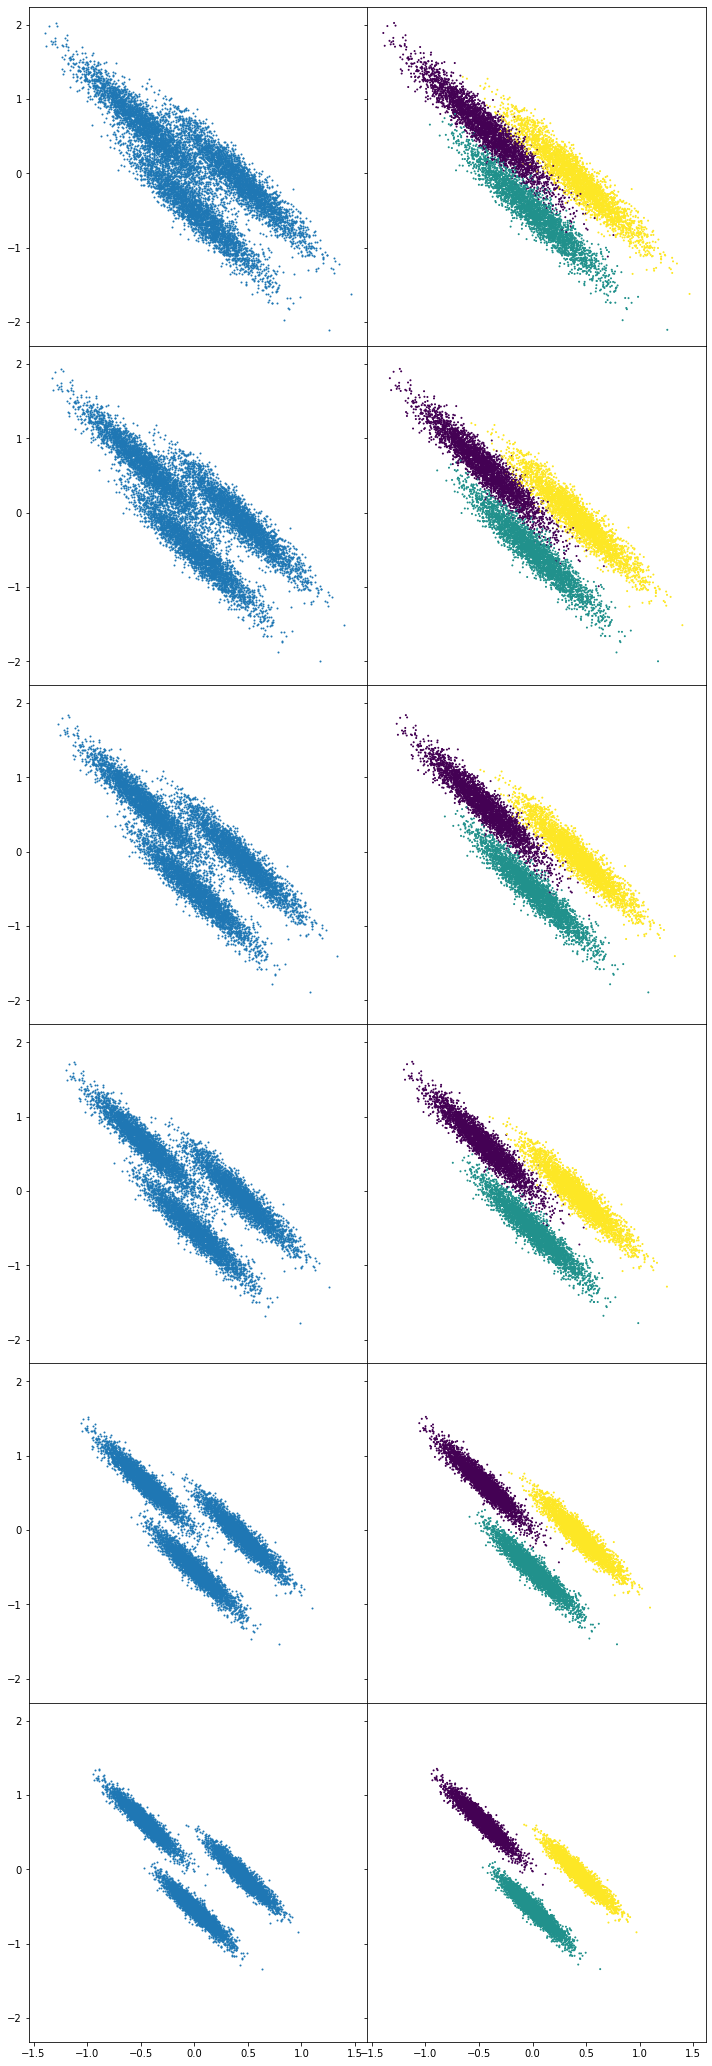

In [9]:
noise_categories = ["vhigh", "high", "med", "low", "vlow", "elow"]
noise_levels = [2.4, 2.2, 2, 1.8, 1.4, 1.1]
transform = np.array([[0.6, -0.6], [-0.4, 0.8]])

blobs_dict = {category:datasets.make_blobs(n_samples=n_datapoints, cluster_std=level, random_state=17)
              for category, level in zip(noise_categories, noise_levels)}
blobs_dict = {category:(np.dot(scale(data[0]), transform), data[1]) for category, data in blobs_dict.items()}

plot_data_labels_dict(blobs_dict, 6, "viridis")   

for category, (data, labels) in blobs_dict.items():
    sk_datasets["longblobs_" + category + "_noise"] = data
    sk_labels["longblobs_" + category + "_noise"] = labels

In [10]:
np.savez("sklearn_data.npz", **sk_datasets)
np.savez("sklearn_labels.npz", **sk_labels)

In [11]:
loaded_data = np.load("sklearn_data.npz")
loaded_data.files

['circles_vhigh_noise',
 'circles_high_noise',
 'circles_med_noise',
 'circles_low_noise',
 'circles_vlow_noise',
 'moons_vhigh_noise',
 'moons_high_noise',
 'moons_med_noise',
 'moons_low_noise',
 'moons_vlow_noise',
 'blobs_vhigh_noise',
 'blobs_high_noise',
 'blobs_med_noise',
 'blobs_low_noise',
 'blobs_vlow_noise',
 'blobs2_vhigh_noise',
 'blobs2_high_noise',
 'blobs2_med_noise',
 'blobs2_low_noise',
 'blobs2_vlow_noise',
 'longblobs_vhigh_noise',
 'longblobs_high_noise',
 'longblobs_med_noise',
 'longblobs_low_noise',
 'longblobs_vlow_noise',
 'longblobs_elow_noise']

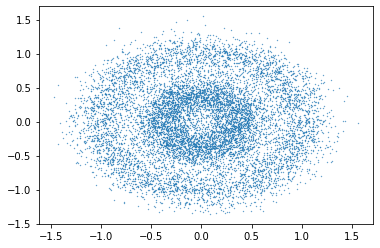

In [12]:
plt.scatter(loaded_data["circles_vhigh_noise"][:, 0], loaded_data["circles_vhigh_noise"][:, 1], s=0.1)

In [13]:
loaded_labels = np.load("sklearn_labels.npz")
loaded_labels.files

['circles_vhigh_noise',
 'circles_high_noise',
 'circles_med_noise',
 'circles_low_noise',
 'circles_vlow_noise',
 'moons_vhigh_noise',
 'moons_high_noise',
 'moons_med_noise',
 'moons_low_noise',
 'moons_vlow_noise',
 'blobs_vhigh_noise',
 'blobs_high_noise',
 'blobs_med_noise',
 'blobs_low_noise',
 'blobs_vlow_noise',
 'blobs2_vhigh_noise',
 'blobs2_high_noise',
 'blobs2_med_noise',
 'blobs2_low_noise',
 'blobs2_vlow_noise',
 'longblobs_vhigh_noise',
 'longblobs_high_noise',
 'longblobs_med_noise',
 'longblobs_low_noise',
 'longblobs_vlow_noise',
 'longblobs_elow_noise']

In [14]:
loaded_data["circles_vhigh_noise"]

array([[-0.71725489,  0.90300128],
       [ 0.07534021, -0.98025204],
       [ 0.6017155 , -0.72908893],
       ...,
       [ 0.00599533,  0.46941985],
       [ 0.08342581,  0.91602345],
       [ 0.21263965,  0.41250396]])

# Multiple-Group Clusters

## Circle

In [15]:
multigroup_datasets = {}
multigroup_labels = {}

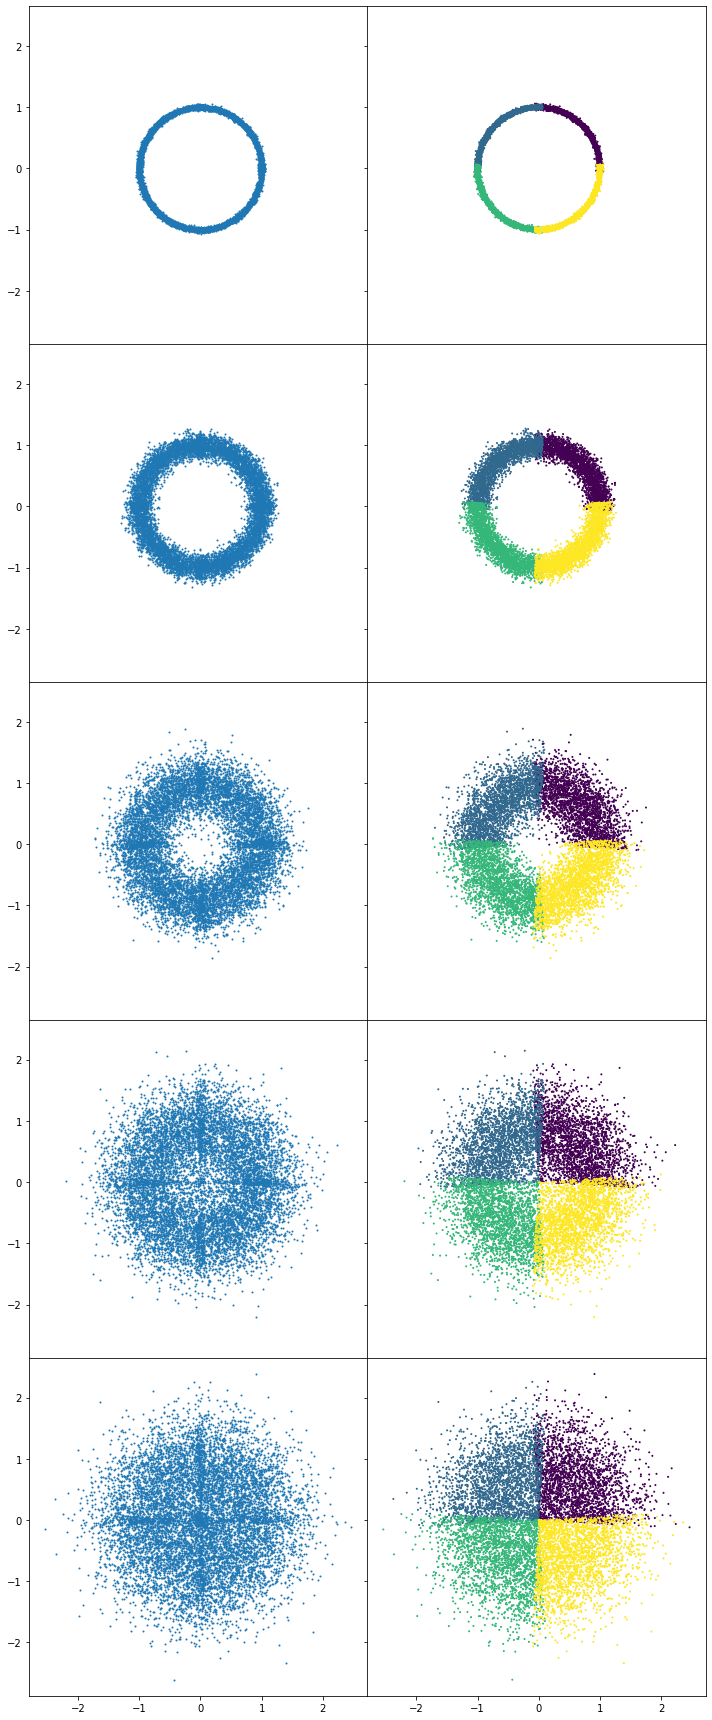

(10000, 2)


In [20]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.02, 0.1, 0.25, 0.35, 0.45]
n_circle_groups = 4
angle_step = 2*np.pi/n_circle_groups
angle_epsilon = (2*np.pi)/100
n_angles = n_datapoints//n_circle_groups

multigroup_circle = {}
for category, level in zip(noise_categories, noise_levels):
    rs = np.abs(np.random.normal(1, level, n_datapoints))
    angles = []
    labels = []
#     print(rs)
    for i, angle in enumerate(np.linspace(0, 2*np.pi, n_circle_groups, endpoint=False)):
        angle_low = angle - angle_epsilon
        angle_high = angle + angle_step + angle_epsilon
        angles.extend(np.random.uniform(angle_low, angle_high, n_angles).tolist())
        labels.extend([i]*n_angles)
    angles = np.array(angles)
    labels = np.array(labels)
    xys = np.column_stack((rs * np.cos(angles), rs * np.sin(angles)))
    
    multigroup_circle[category] = (xys, labels)
            
        
plot_data_labels_dict(multigroup_circle, 5, "viridis")

for category, (data, labels) in multigroup_circle.items():
    multigroup_datasets["circle_" + category + "_noise"] = data
    multigroup_labels["circle_" + category + "_noise"] = labels


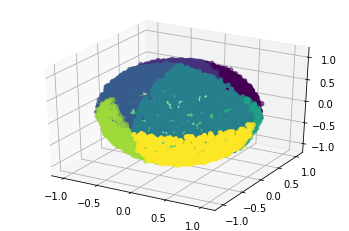

In [17]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.45, 0.35, 0.25, 0.1, 0.02]
n_phi_groups = 4
n_theta_groups = 2

phi_step = 2*np.pi/n_phi_groups
phi_epsilon = (2*np.pi)/100

theta_step = np.pi/n_theta_groups
theta_epsilon = np.pi/100

n_phis = n_datapoints//n_phi_groups
n_thetas = n_phis//n_theta_groups

multigroup_sphere = {}
for category, level in zip(noise_categories, noise_levels):
    rs = np.abs(np.random.normal(1, level, n_datapoints))
    phis = []
    thetas = []
    labels = []
#     print(rs)
    for i, phi in enumerate(np.linspace(0, 2*np.pi, n_phi_groups, endpoint=False)):
#         print("i:", i)
        phi_low = phi - phi_epsilon
        phi_high = phi + phi_step + phi_epsilon
        phis.extend(np.random.uniform(phi_low, phi_high, n_phis).tolist())
        
        for j, theta in enumerate(np.linspace(0, np.pi, n_theta_groups, endpoint=False)):
#             print("j:", j)
            theta_low = theta - theta_epsilon
            theta_high = theta + theta_step + theta_epsilon
            thetas.extend(np.random.uniform(theta_low, theta_high, n_thetas).tolist())
            
            labels.extend([i + n_phi_groups*j]*n_thetas)
               
    phis = np.array(phis)
    thetas = np.array(thetas)
    labels = np.array(labels)
    
    xyzs = np.column_stack((rs * np.cos(phis) * np.sin(thetas), 
                            rs * np.sin(phis) * np.sin(thetas),
                            rs * np.cos(thetas)))
    
    multigroup_sphere[category] = (xyzs, labels)
            
        
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xyzs[:, 0], xyzs[:, 1], xyzs[:, 2], c=labels);
plt.show()

for category, (data, labels) in multigroup_circle.items():
    multigroup_datasets["sphere_" + category + "_noise"] = data
    multigroup_labels["sphere_" + category + "_noise"] = labels


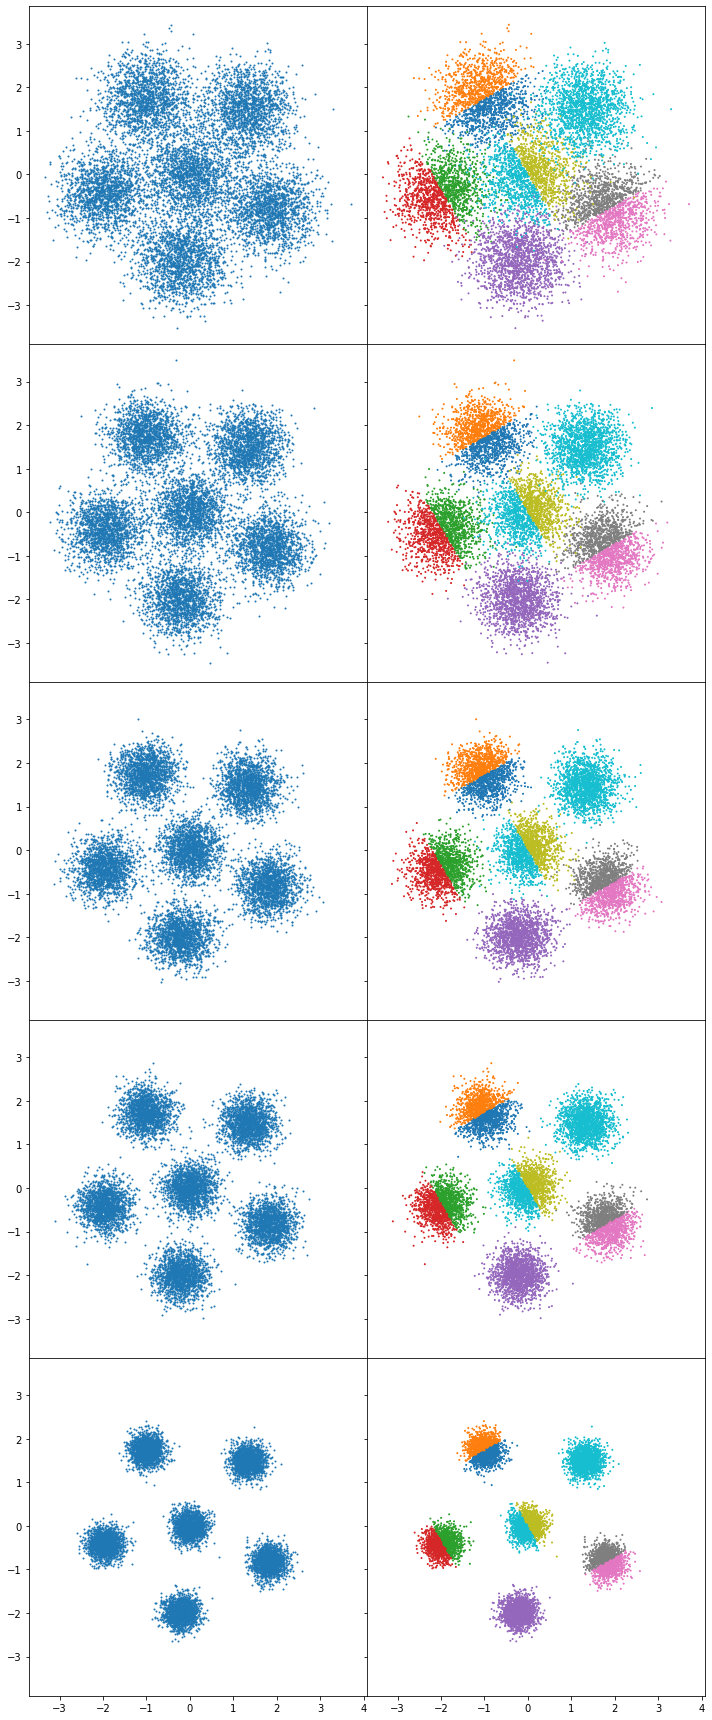

In [19]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.5, 0.425, 0.35, 0.3, 0.2]
centers = [(2, 0), (0.62, 1.9), (-1.62, 1.175), (-1.62, -1.175), (0, 0), (0.62, -1.9)]
mg_blobs_dict = {}

point_rotation_theta = 2*np.pi/3
point_rotation_matrix = np.array([[np.cos(point_rotation_theta), -np.sin(point_rotation_theta)],
                                  [np.sin(point_rotation_theta), np.cos(point_rotation_theta)]])

for category, level in zip(noise_categories, noise_levels):
    xs = []
    ys = []
    labels = []
    for i, center in enumerate(centers):
        # heuristic way to get to 10000 datapoints exactly
        center_xs = np.random.normal(center[0], level, n_datapoints//6 + 1)
        center_ys = np.random.normal(center[1], level, n_datapoints//6 + 1)

        if i % 3 == 0:
            center_labels = [i*2 + 1 if cond else i*2 for cond in (center_xs > center[0])]
        elif i % 3 == 1:
            center_labels = [i*2 + 1 if cond else i*2 for cond in (center_ys > center[1])]
        else:
            center_labels = [i*2] * (len(center_xs))
            
        xs.extend(center_xs)
        ys.extend(center_ys)
        labels.extend(center_labels)
            
    
    xys = np.column_stack((np.array(xs)[0:n_datapoints], np.array(ys)[0:n_datapoints]))
    xys = np.matmul(point_rotation_matrix, xys.T).T
    
    labels = np.array(labels)[0:n_datapoints]
    mg_blobs_dict[category] = (xys, labels)
    
plot_data_labels_dict(mg_blobs_dict, 5, "tab10")

for category, (data, labels) in mg_blobs_dict.items():
    multigroup_datasets["blobs_" + category + "_noise"] = data
    multigroup_labels["blobs_" + category + "_noise"] = labels


In [ ]:
np.savez("multigroup_data.npz", **multigroup_datasets)
np.savez("multigroup_labels.npz", **multigroup_labels)

In [21]:
print(xys.shape)

(10000, 2)
